In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import make_gaussian_quantiles

In [2]:
X1, y1 = make_gaussian_quantiles(cov=2,n_samples=200,n_features=2,\
                                n_classes=2, random_state=1)
X2, y2 = make_gaussian_quantiles(mean=(3,3), cov=1.5,n_samples=300,\
                                n_features=2,n_classes=2, random_state=1)
X = np.concatenate((X1, X2))
y = np.concatenate((y1, -y2 + 1))

In [3]:
bdt = AdaBoostClassifier(DecisionTreeClassifier(max_depth=1),\
                        algorithm="SAMME",n_estimators=200)
bdt.fit(X,y)

AdaBoostClassifier(algorithm='SAMME',
          base_estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=1,
            max_features=None, max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=None, splitter='best'),
          learning_rate=1.0, n_estimators=200, random_state=None)

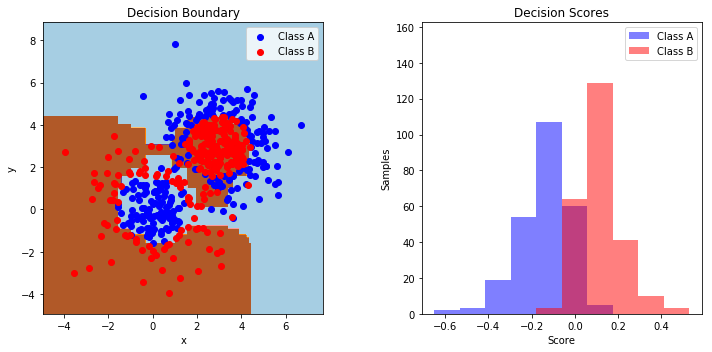

In [5]:
plot_colors = "br"
plot_step = 0.02
class_names = "AB"

plt.figure(figsize=(10,5))
plt.subplot(121)
x_min, x_max = X[:,0].min()-1, X[:,0].max()+1
y_min, y_max = X[:,1].min()-1, X[:,1].max()+1
xx, yy = np.meshgrid(np.arange(x_min, x_max, plot_step),\
                    np.arange(y_min, y_max, plot_step))
Z = bdt.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
cs = plt.contourf(xx,yy,Z, cmap=plt.cm.Paired)
plt.axis("tight")

for i, n, c in zip(range(2), class_names, plot_colors):
    idx = np.where(y == i)
    plt.scatter(X[idx, 0], X[idx, 1],
                c=c, cmap=plt.cm.Paired,
                label="Class %s" % n)
plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)
plt.legend(loc='upper right')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Decision Boundary')

twoclass_output = bdt.decision_function(X)
plot_range = (twoclass_output.min(), twoclass_output.max())
plt.subplot(122)
for i, n, c in zip(range(2), class_names, plot_colors):
    plt.hist(twoclass_output[y == i],
             bins=10,
             range=plot_range,
             facecolor=c,
             label='Class %s' % n,
             alpha=.5)
x1, x2, y1, y2 = plt.axis()
plt.axis((x1, x2, y1, y2 * 1.2))
plt.legend(loc='upper right')
plt.ylabel('Samples')
plt.xlabel('Score')
plt.title('Decision Scores')
plt.tight_layout()
plt.subplots_adjust(wspace=0.35)